In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [5]:
df = df.drop('CustomerID',axis = 1)

In [6]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Exploring the relationship between customers Annual income and their spending scores

In [8]:
data = df[['Annual Income (k$)','Spending Score (1-100)']]

In [9]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# EDA 

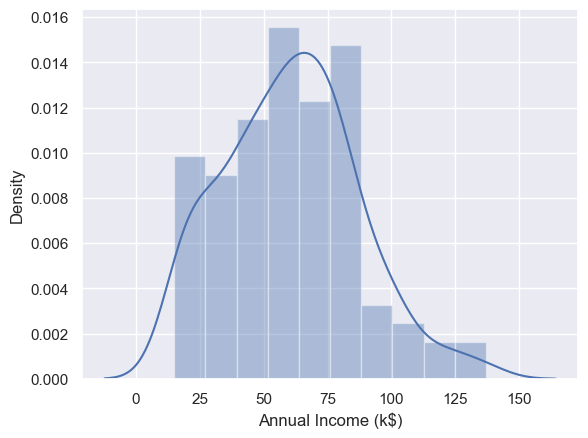

In [11]:
sns.distplot(data['Annual Income (k$)'],kde = 1000 );

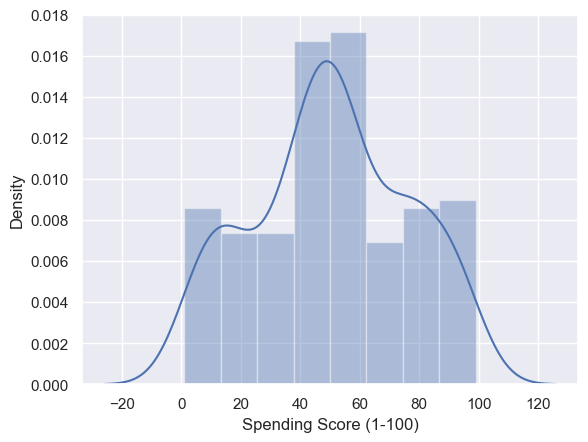

In [12]:
sns.distplot(data['Spending Score (1-100)'],kde = 1000 );

### F

### DATA PREPROCESSING

In [14]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [16]:
## check null value

data.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# KMEANS CLUSTERING

In [18]:
from sklearn.cluster import KMeans

#### Using KMeans to spot the optimal number of clusters

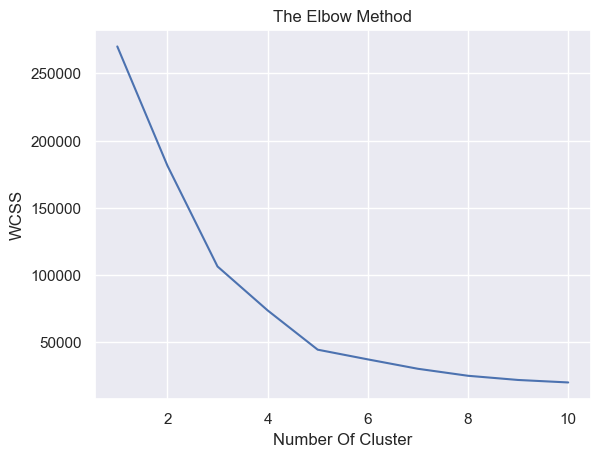

In [20]:
wcss = []

for i in range(1,11):
    kmeans=  KMeans(i,init = 'k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Cluster')
plt.ylabel('WCSS')
plt.show()
    

In [21]:
kmeans=  KMeans(5,init = 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(data)

In [22]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [23]:
data = data.values

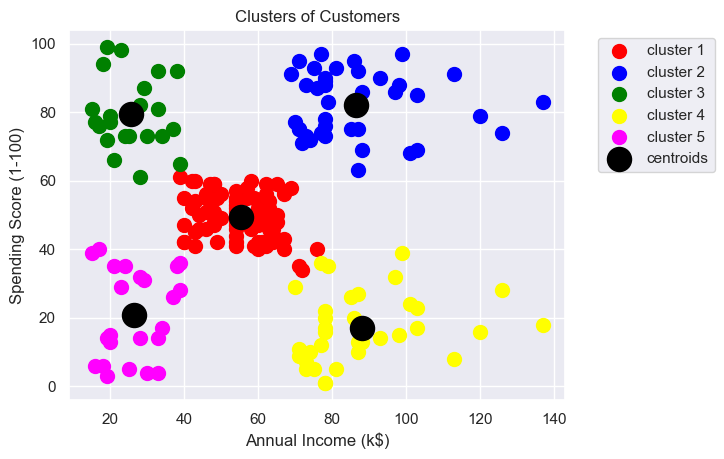

In [24]:

# Plotting the clusters
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=100, c='red', label='cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=100, c='blue', label='cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s=100, c='green', label='cluster 3')
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s=100, c='yellow', label='cluster 4')
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s=100, c='magenta', label='cluster 5')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='centroids')

# Adding title and labels
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Insights and Recommendations and 
Cluster 1 represents customers with moderate spending scores, likely balancing their expenses with their slightly above-average incomes. This group may consist of cautious spenders who manage their budgets carefully despite having the means to spend more.

Cluster 2 includes high earners who also spend significantly, indicating a segment that greatly contributes to the mall's revenue. This group can be seen as premium customers.

Cluster 3 consists of individuals who, despite having lower incomes, still maintain high spending scores. This segment might represent value-seeking customers who prioritize mall purchases over other expenses.

Cluster 4 captures high-income individuals who exhibit lower spending scores. These customers, while financially capable, are conservative with their expenditures and could be targeted with strategies to increase their spending through premium products and services.

Cluster 5 is characterized by low earners with correspondingly low spending scores, possibly due to budget constraints.


## Recommendations

For High Spenders (Clusters 2 and 3): Implement loyalty programs, special promotions, and premium services to encourage continued patronage and increased spending.
For Average and Wise Spenders (Clusters 1 and 4): Engage these customers with personalized marketing, feedback solicitation, and exclusive offers to incentivize higher spending.
For Lower Spend and Earn Segments (Cluster 5): Introduce budget-friendly options, installment plans, and promotions to increase their purchasing power and frequency.

# HIERARHICAL CLUSTERING 

### Exploring the relationship between customers Age and their spending scores

In [26]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [27]:
dff = df[['Age','Spending Score (1-100)']]

In [28]:
dff.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


## Using dendrogram to check for optimal number of clusters

In [30]:
from scipy.cluster import hierarchy as sch

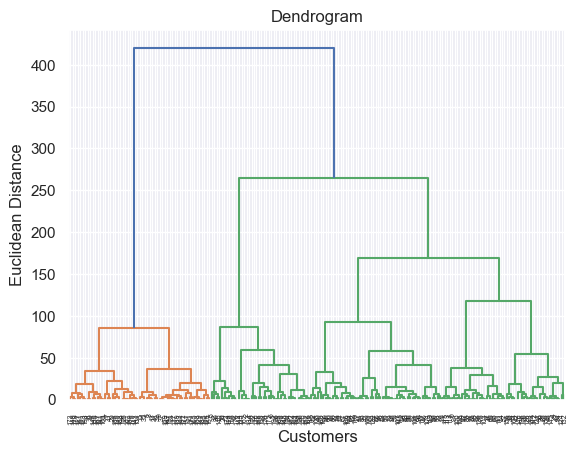

In [31]:
dendrogram = sch.dendrogram(sch.linkage(dff,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
hc =  AgglomerativeClustering(2,affinity ='euclidean',linkage = 'ward')

In [34]:
y_hc = hc.fit_predict(dff)

In [35]:
y_hc

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [36]:
dff = dff.values

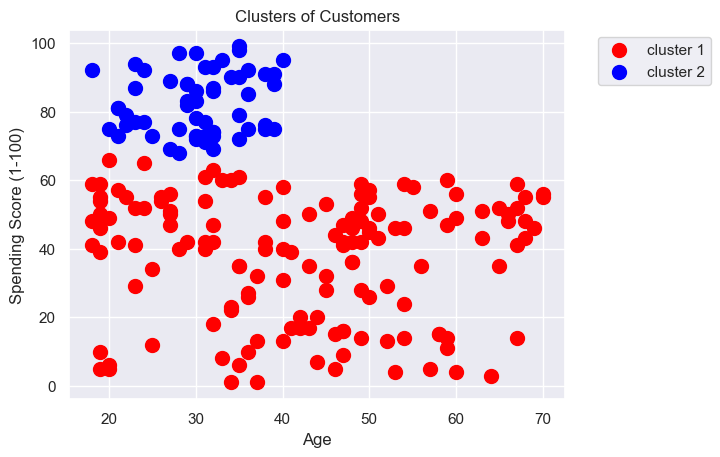

In [37]:
# Plotting the clusters
plt.scatter(dff[y_hc == 0, 0], dff[y_hc == 0, 1], s=100, c='red', label='cluster 1')
plt.scatter(dff[y_hc == 1, 0], dff[y_hc == 1, 1], s=100, c='blue', label='cluster 2')
# Adding title and labels
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## Insights and Recommendations 
This segmentation reveals two main groups based on age and spending patterns:

Cluster 1 includes customers from all age groups who are characterized as low spenders. This suggests a widespread cautious spending habit across various demographics.

Cluster 2 comprises primarily younger customers who spend significantly, indicating that the mall's offerings resonate well with this demographic.

### Recommendations
For Young High Spenders (Cluster 2): Continue to attract this group with youth-oriented programs and products. Explore new trends and digital marketing strategies to maintain their interest and loyalty.
For Young Low Spenders (Cluster 1): Investigate the barriers to higher spending among these customers through surveys and feedback mechanisms, and adjust offerings accordingly to enhance appeal.
For Older Customers (Cluster 1): Develop tailored marketing strategies and product selections that cater to older adults, potentially increasing their engagement and spending at the mall.